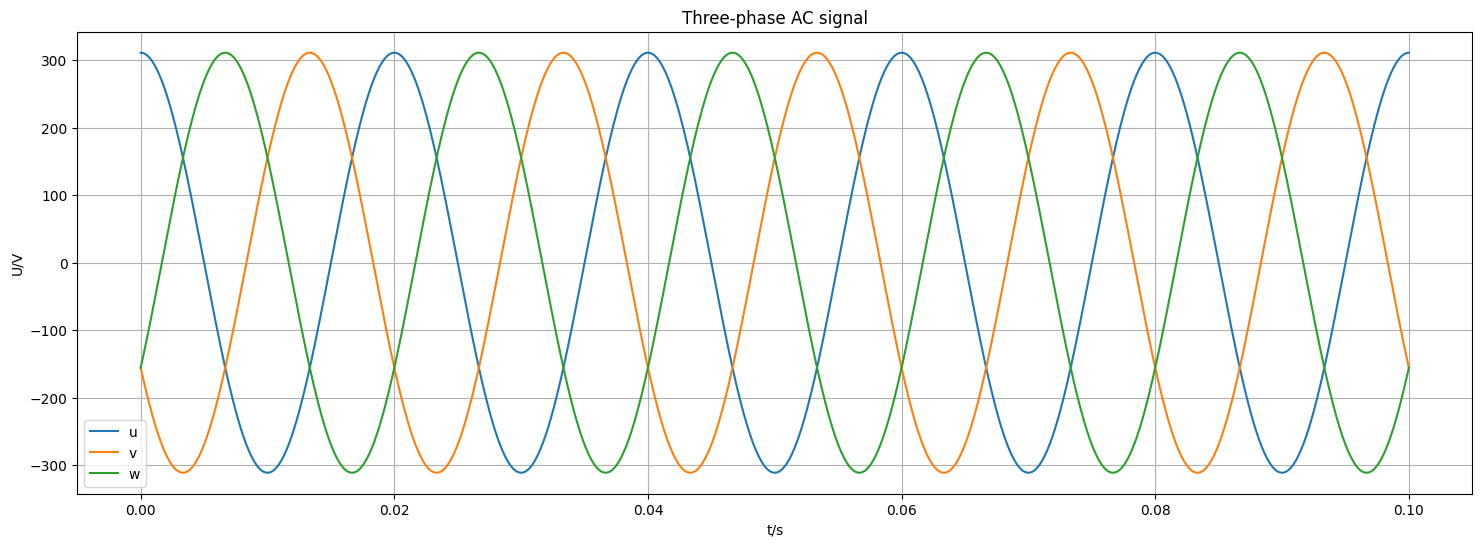

In [3]:
# VFD-AC2DC

import numpy as np
import matplotlib.pyplot as plt

# 三相交流电信号
t = np.linspace(0, 0.1, 1000)  # 时间序列
f = 50  # 频率
w = 2 * np.pi * f  # 角频率
A = 220 * np.sqrt(2)  # 幅值
u = A * np.cos(w * t)  
v = A * np.cos(w * t + 2 * np.pi / 3)
w = A * np.cos(w * t + 4 * np.pi / 3)

# plot u, v, w
plt.figure(figsize=(18, 6))
plt.plot(t, u, label='u')
plt.plot(t, v, label='v')
plt.plot(t, w, label='w')
plt.legend()
plt.xlabel('t/s')
plt.ylabel('U/V')
plt.title('Three-phase AC signal')
plt.grid()
plt.show()